In [1]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#Store file path in a variable and read in csv

file = "MasterYouTube.csv"

master_df = pd.read_csv(file)

#Print head
master_df.head()

,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
1,1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
2,2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404
3,3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122
4,4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561


In [3]:
#Pull out the columns I want

time_df = master_df[["Video Title", "Video ID", "Time Published", "Number of Days Trending", "Total Views"]]

time_df.head()

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,2018-05-13T18:03:56.000Z,29,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,2018-05-09T17:00:00.000Z,29,17424422
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,2018-05-10T16:00:11.000Z,28,40205404
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,2018-05-15T13:01:12.000Z,28,12834122
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,2018-05-11T04:00:34.000Z,28,8441561


In [4]:
#Reformat time so I can pull out just the hour published and put it in a new column
#Pull out just the time of day (Hour) and create a new column

time_df["Hour Published"] = pd.to_datetime(time_df["Time Published"]).dt.hour

time_df

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views,Hour Published
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,2018-05-13T18:03:56.000Z,29,9081270,18
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,2018-05-09T17:00:00.000Z,29,17424422,17
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,2018-05-10T16:00:11.000Z,28,40205404,16
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,2018-05-15T13:01:12.000Z,28,12834122,13
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,2018-05-11T04:00:34.000Z,28,8441561,4
...,...,...,...,...,...,...
6346,Iraq-Iran earthquake: Deadly tremor hits borde...,goP4Z5wyOlM,2017-11-12T21:16:40.000Z,1,34785,21
6347,Celebrities rally around bullied boy after he ...,IXJhN4cOVM0,2017-12-11T13:06:08.000Z,1,84968,13
6348,"Stock market plunges, but it's not time to panic",WArjc_PF2b4,2018-02-05T21:26:11.000Z,1,58231,21
6349,JUSTICE LEAGUE Spoiler Review and Discussion,UrSxvUc5R6Q,2017-11-18T19:42:33.000Z,1,44805,19


In [5]:
#Organize by hour published

time_df = time_df.sort_values(["Hour Published", "Total Views"], ascending=False)

time_df.head()

,Video Title,Video ID,Time Published,Number of Days Trending,Total Views,Hour Published
87,"Calvin Harris, Dua Lipa - One Kiss (Official V...",DkeiKbqa02g,2018-05-02T23:01:00.000Z,21,71017021,23
2139,Turkish Airlines - 5 Senses with Dr. Oz,yvicqMrAHvQ,2018-02-04T23:55:21.000Z,7,23932421,23
1061,Jurassic World: Fallen Kingdom - Official Trai...,NooW_RbfdWI,2018-02-04T23:28:16.000Z,10,21113889,23
1790,Hope Detector | Hyundai NFL Super Bowl LII,wJJqGh2HLM8,2018-02-04T23:31:40.000Z,8,15904385,23
21,Calum Scott - What I Miss Most (Official Video),H7gh2fmdjCU,2018-05-16T23:00:00.000Z,27,6379536,23


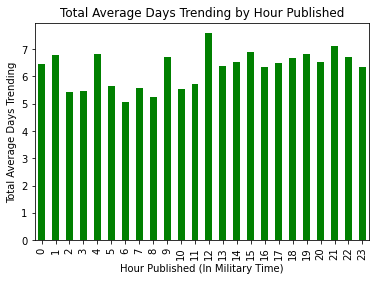

In [6]:
#Find average days trending vs. hour published and put into a bar graph

time_df.groupby('Hour Published')['Number of Days Trending'].mean().plot(kind='bar', color="green")

plt.title("Total Average Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Average Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingMeanperHourPublishedBar")

plt.show()


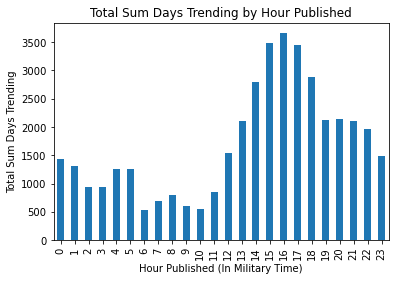

In [7]:
#Do the same but with Sum

time_df.groupby('Hour Published')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Sum Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingSumperHourPublishedBar")

plt.show()

### These sort of show that publishing in the afternoon is better, but the relationship is not strong enough for me to feel comfortable pushing it.

What can I infer from this?

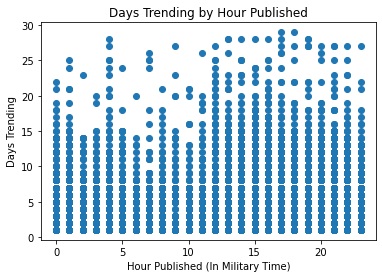

In [8]:
#Scatterplot
plt.scatter(time_df["Hour Published"], time_df["Number of Days Trending"])
plt.title("Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingperHourPublishedScatter")

plt.show()

In [9]:
#Correlation
hour = time_df["Hour Published"]
days = time_df["Number of Days Trending"]

correlation = st.pearsonr(hour, days)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is 0.05


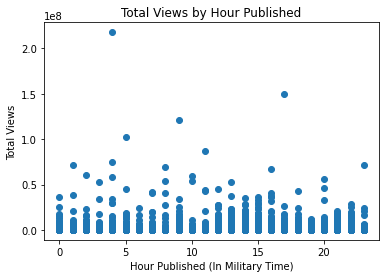

In [10]:
#Scatterplot
plt.scatter(time_df["Hour Published"], time_df["Total Views"])
plt.title("Total Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsperHourPublishedScatter")

plt.show()

In [11]:
#Correlation
hour = time_df["Hour Published"]
views = time_df["Total Views"]

correlation = st.pearsonr(hour, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.04


## This shows that there is no noticable correlation between the hour it is published and the number of views that a video receives while trending.

In [12]:
#Find total views of all videos by hour published and put into a df
totalviews = time_df.groupby('Hour Published')['Total Views'].sum()

totalviews

Hour Published
0     325689745
1     346618108
2     303396837
3     279749245
4     731168459
5     542974408
6     145420964
7     281727760
8     335686853
9     392438288
10    205024743
11    317472870
12    407231964
13    656567216
14    724110833
15    871100639
16    844237997
17    765279514
18    595933794
19    380305395
20    510189879
21    501806049
22    441856950
23    326207897
Name: Total Views, dtype: int64

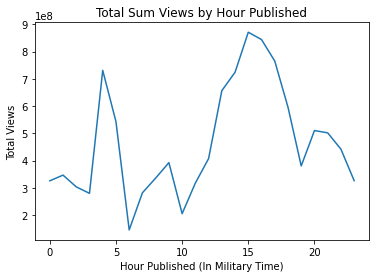

In [13]:
#Create a line graph to show this
time_df.groupby('Hour Published')['Total Views'].sum().plot(kind='line')

plt.title("Total Sum Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsSumperHourPublishedLine")

plt.show()

In [14]:
#Find total average views of all videos by hour published
totalviews = time_df.groupby('Hour Published')['Total Views'].mean()

totalviews

Hour Published
0     1.467071e+06
1     1.786691e+06
2     1.763935e+06
3     1.617048e+06
4     3.952262e+06
5     2.456898e+06
6     1.384962e+06
7     2.253822e+06
8     2.223092e+06
9     4.360425e+06
10    2.092089e+06
11    2.130690e+06
12    1.996235e+06
13    2.001729e+06
14    1.687904e+06
15    1.728374e+06
16    1.463151e+06
17    1.443924e+06
18    1.376291e+06
19    1.222847e+06
20    1.560214e+06
21    1.695291e+06
22    1.513209e+06
23    1.388119e+06
Name: Total Views, dtype: float64

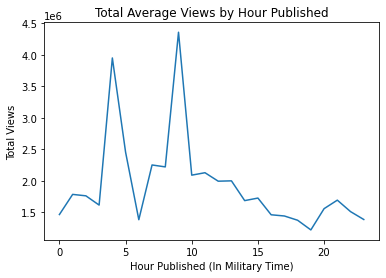

In [15]:
#Create line graph that shows time (x) by average views(y) 

#Create a line graph to show this
time_df.groupby('Hour Published')['Total Views'].mean().plot(kind='line')

plt.title("Total Average Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsMeanperHourPublishedLine")

plt.show()

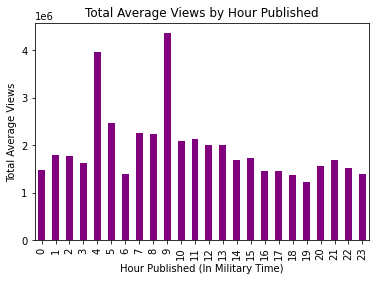

In [16]:
#Find average views vs. hour published and put into a bar graph

time_df.groupby('Hour Published')['Total Views'].mean().plot(kind='bar', color="purple")

plt.title("Total Average Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Average Views")

plt.savefig("OutputCharts/TotalViewsMeanperHourPublishedBar")

plt.show()


What can I infer from this?